<a href="https://colab.research.google.com/github/R-Damanhuri/Fitness-Attendance-Classification/blob/main/Fitness_Attendance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Domain Proyek

GoalZone adalah jaringan klub fitnes di Kanada. GoalZone menawarkan berbagai kelas fitnes dalam dua kapasitas: 25 dan 15. Beberapa kelas selalu dipesan penuh. Kelas yang dipesan penuh seringkali memiliki tingkat kehadiran yang rendah. <br><br>
GoalZone ingin menambah jumlah ruang yang tersedia untuk kelas. Mereka ingin melakukan hal ini dengan **memprediksi apakah anggota akan menghadiri kelas atau tidak.** Jika mereka dapat memperkirakan anggota tidak akan menghadiri kelas, mereka dapat menyediakan ruang lain.

# Business Understanding

## Problem statement
* Atribut apa yang paling berpengaruh terhadap kehadiran anggota di kelas fitnes?
* Apakah anggota akan menghadiri kelas fitnes atau tidak berdasarkan atribut yang diketahui?

## Goals
* Mengetahui atribut paling berkorelasi dengan kehadiran anggota pada kelas fitnes pesanan.
* Membuat model prediktif kehadiran anggota fitnes pada kelas pesanan berdasarkan atribut yang ada.

#Solution statement
* Mentransformasi atribut sesuai kebutuhan dan memilih atribut berdasarkan fungsi correlation
* Membandingkan 6 algoritma machine learning klasik dan memilih performa terbaik

# Data Understanding

## Data loading

Dataset bersumber dari Kaggle pada tautan: https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification?resource=download



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/fitness_class_2212.csv")

## Variable description

In [3]:
df.shape

(1500, 8)

Dataset terdiri dari 1500 baris data dan 8 kolom atribut.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


Deskripsi Atribut:<br>
*   booking_id: Nominal. Nomor identifikasi untuk pemesanan
*   months_as_member: Diskrit. Lama terdaftar sebagai anggota dalam bulan, minimal 1
*   weight: Kontinu. Berat anggota dalam kilogram, dibulatkan 2 desimal
*   days_before: Diskrit. Jumlah hari sebelum kelas yang didaftar anggota
*   day_of_week: Nominal. Hari pelaksanaan kelas
*   time: Ordinal. Waktu pelaksanaan kelas, AM atau PM
*   category: Nominal. Kategori kelas fitnes
*   attended: Nominal. Kehadiran anggota di kelas (1: hadir, 0: tidak)



In [5]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


Ringkasan statistik dataset dapat dilihat di atas.

## Missing value handling

In [6]:
df["weight"].isna().value_counts()

False    1480
True       20
Name: weight, dtype: int64

Terdapat 20 missing value berupa NaN pada atribut weight

In [7]:
df['weight'][df["weight"].isna()== True]

114    NaN
211    NaN
315    NaN
366    NaN
482    NaN
552    NaN
655    NaN
734    NaN
742    NaN
781    NaN
864    NaN
930    NaN
980    NaN
989    NaN
1075   NaN
1119   NaN
1266   NaN
1336   NaN
1363   NaN
1416   NaN
Name: weight, dtype: float64

In [8]:
df['weight'].fillna(df['weight'].mean(), inplace=True)

Missing value diisi dengan mean atribut weight

In [9]:
df["weight"].isna().value_counts()

False    1500
Name: weight, dtype: int64

## Univariate analysis

In [10]:
df["days_before"].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

Terdapat inkonsistensi pada value atribut days_before. Beberapa value mengandung kata days, sisanya tidak.

In [11]:
df["days_before"]=df["days_before"].str.replace(' days', '').str.strip().astype(int)

Kata days dihilangkan dari value, lalu tipe data diubah menjadi integer

In [12]:
df["days_before"].unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [13]:
df["days_before"].dtype

dtype('int64')

array([[<Axes: title={'center': 'booking_id'}>,
        <Axes: title={'center': 'months_as_member'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'days_before'}>,
        <Axes: title={'center': 'attended'}>, <Axes: >]], dtype=object)

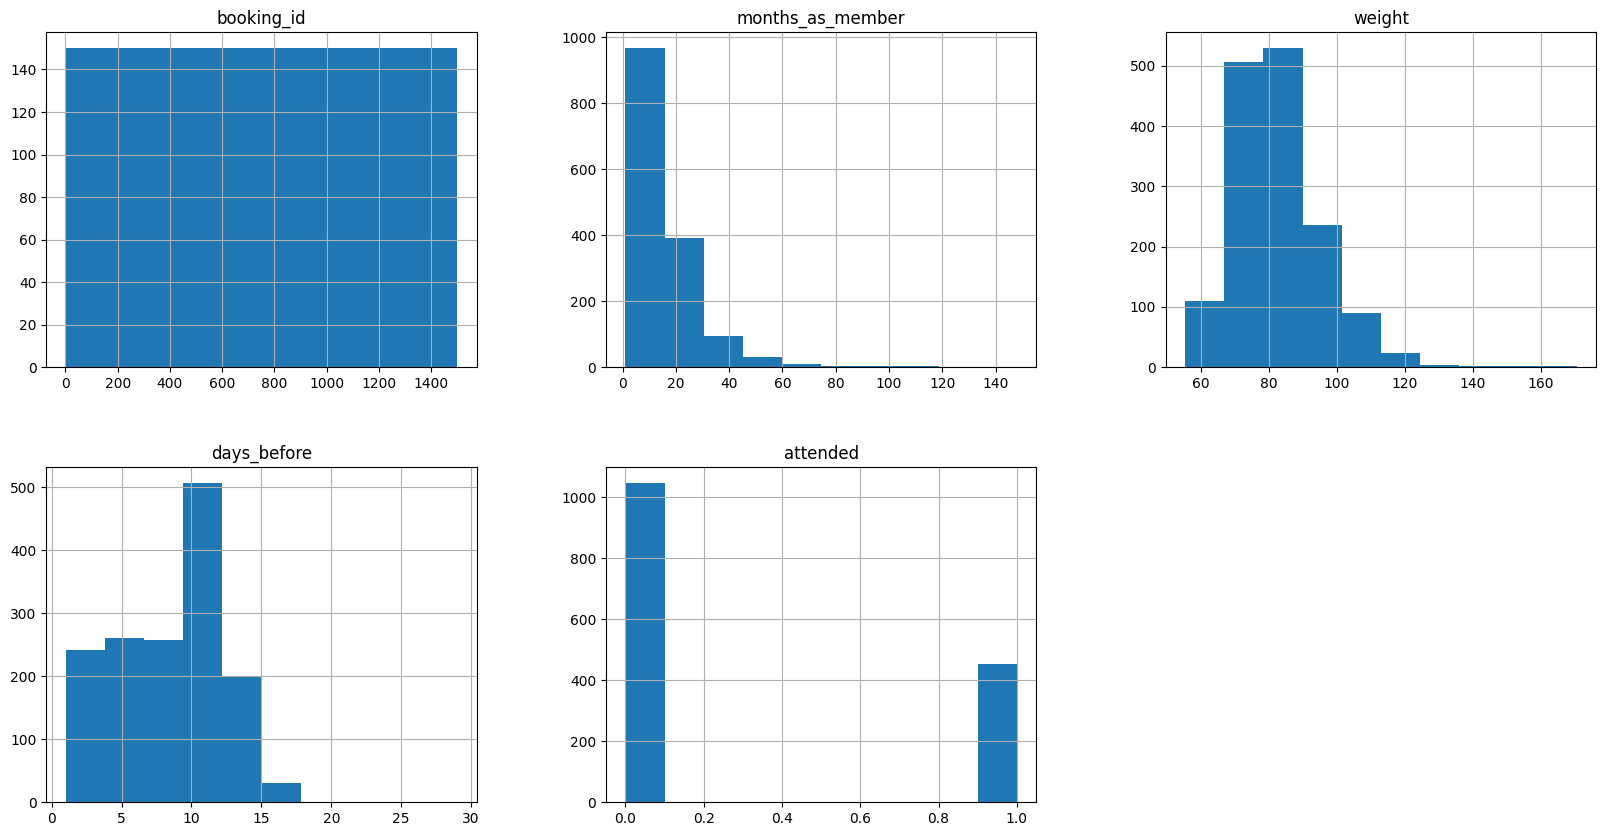

In [14]:
df.hist(layout=(2,3), figsize=(20,10))

*   Tidak ada booking_id yang redundan
*   Mayoritas anggota telah bergabung < 20 bulan, memiliki berat badan 80-an kg, dan memesan kelas 10-an hari sebelum pelaksanaan
*   Lebih banyak anggota yang tidak menghadiri kelas fitnes daripada yang menghadiri

In [15]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

Terdapat inkonsistensi pada value atribut day_of_week. Ada nama hari yang tidak disingkat, disingkat dengan titik, dan disingkat tanpa titik. Perlu penyesuaian.

In [16]:
day_mapper={
    "Wednesday": "Wed",
    "Fri.": "Fri",
    "Monday": "Mon"
}

In [17]:
df['day_of_week'] = df['day_of_week'].replace(day_mapper)

Value atribut day_of_week berupa singkatan nama hari bahasa Inggris tanpa titik

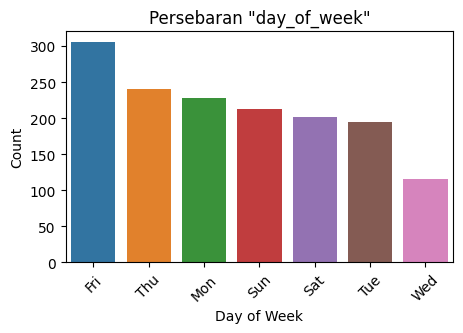

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts = df['day_of_week'].value_counts()

plt.figure(figsize=(5, 3))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Persebaran "day_of_week"')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

Kelas fitnes pada hari Jumat paling banyak dipesan, sedangkan pada hari Rabu paling  sedikit dipesan.

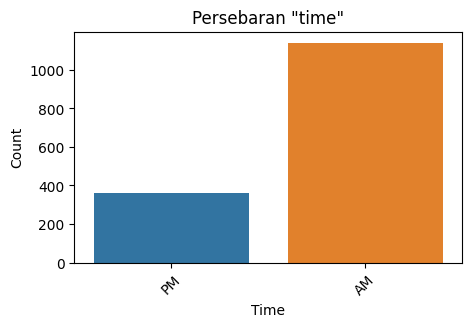

In [19]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df["time"])
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Persebaran "time"')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

Lebih banyak kelas AM (setelah siang hari) yang dipesan daripada PM

In [20]:
df["category"].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

Terdapat value - pada atribut category yang kurang bagus untuk laporan. Perlu penyesuaian.

In [21]:
df["category"]=df["category"].str.replace('-', 'N/A').str.strip()

Value - diganti dengan N/A

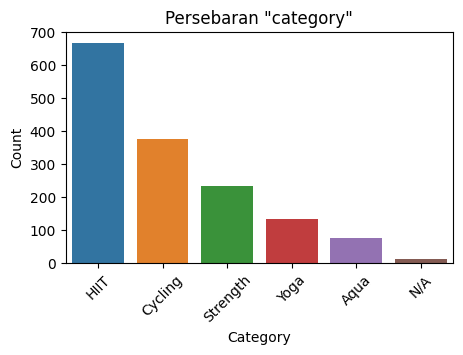

In [22]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df["category"],order=df['category'].value_counts(ascending=False).index)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Persebaran "category"')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

In [23]:
df["category"].value_counts(normalize=True)

HIIT        0.444667
Cycling     0.250667
Strength    0.155333
Yoga        0.090000
Aqua        0.050667
N/A         0.008667
Name: category, dtype: float64

Kategori kelas fitnes HIIT menjadi yang paling banyak dipesan, kelas Aqua menjadi yang paling sedikit dipesan untuk kelas diketahui, sedangkan kelas N/A (tidak diketahui) menjadi yang paling sedikit dipesan secara keseluruhan.

## Multivariate analysis

<ipython-input-24-8319adb532b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

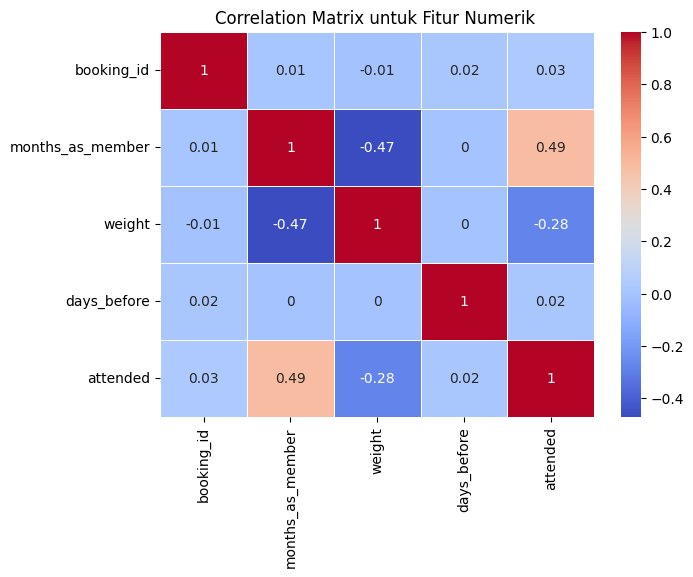

In [24]:
plt.figure(figsize=(7, 5))
corr = df.corr().round(2)

sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ")

Atribut numerik yang berkorelasi kuat dengan kehadiran adalah:
*   months_as_member: positif (0.49)
*   weight: negatif (-0.28)

Atribut numerik yang berkorelasi lemah dengan kehadiran adalah: <br>
*   booking_id: 0.03
*   days_before: 0.02

Kedua atribut dapat didrop

# Data Preparation

## Encoding

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


In [26]:
df_final = pd.concat([df, pd.get_dummies(df['day_of_week'], prefix="day")], axis=1)
df_final = pd.concat([df, pd.get_dummies(df['time'], prefix="time")], axis=1)
df_final = pd.concat([df, pd.get_dummies(df['category'], prefix="cat")], axis=1)
df_final.drop(['day_of_week','time','category','booking_id','days_before'], axis=1, inplace=True)

*   Dilakukan osne-hot encoding untuk atribut kategorikal
*   Dilakukan droping terhadap atribut yang tidak diperlukan

In [27]:
df_final.head()

,months_as_member,weight,attended,cat_Aqua,cat_Cycling,cat_HIIT,cat_N/A,cat_Strength,cat_Yoga
0,17,79.56,0,0,0,0,0,1,0
1,10,79.01,0,0,0,1,0,0,0
2,16,74.53,0,0,0,0,0,1,0
3,5,86.12,0,0,1,0,0,0,0
4,15,69.29,0,0,0,1,0,0,0


## Data splitting

In [28]:
from sklearn.model_selection import train_test_split

X = df_final.drop(["attended"],axis =1)
y = df_final["attended"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Dataset displit menjadi 80% data train dan 20% data test.

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1500
Total # of sample in train dataset: 1200
Total # of sample in test dataset: 300


## Data normalization

In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1500 non-null   int64  
 1   weight            1500 non-null   float64
 2   attended          1500 non-null   int64  
 3   cat_Aqua          1500 non-null   uint8  
 4   cat_Cycling       1500 non-null   uint8  
 5   cat_HIIT          1500 non-null   uint8  
 6   cat_N/A           1500 non-null   uint8  
 7   cat_Strength      1500 non-null   uint8  
 8   cat_Yoga          1500 non-null   uint8  
dtypes: float64(1), int64(2), uint8(6)
memory usage: 44.1 KB


In [31]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['months_as_member', 'weight']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

Dilakukan normalisasi secara terpisah, pertama untuk data train.

In [32]:
X_train[numerical_features].describe().round(4)

,months_as_member,weight
count,1200.0000,1200.0000
mean,-0.0000,0.0000
std,1.0004,1.0004
min,-1.1080,-2.1302
25%,-0.5748,-0.7015
50%,-0.2701,-0.1252
75%,0.2630,0.5331
max,10.0885,6.8556


# Model Development

In [33]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [34]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
models = pd.DataFrame(columns=['mse_train', 'mse_test', 'acc_train', 'acc_test'], index=['SVM','LogisticRegression','DecisionTree', 'RandomForest', 'XGBoost','KNN'])

*   Model yang dikembangkan adalah SVM, Logistic Regression, Decision Tree, Random Forest, XGBoost dan KNN
*   Metrik evaluasi yang digunakan adalah MSE, Recall, dan Accuracy

In [35]:
models

,mse_train,mse_test,acc_train,acc_test
SVM,NaN,NaN,NaN,NaN
LogisticRegression,NaN,NaN,NaN,NaN
DecisionTree,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN


## SVM

In [36]:
#SVM
svm = SVC(random_state = 42)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_train)

## Logistic Regression

In [37]:
#Logistic regression
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_train)

## Decision Tree

In [38]:
#Decision tree
dtree = DecisionTreeClassifier(random_state = 42)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_train)

## Random Forest

In [39]:
#Random Forest
randof = RandomForestClassifier(random_state = 42)
randof.fit(X_train, y_train)
y_pred = randof.predict(X_train)

## XGBoost

In [40]:
#XGBoost
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_train)

## KNN

In [41]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

# Model Evaluation

In [42]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Dilakukan normalisasi untuk data test.

In [43]:
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'SVM':svm, 'LogisticRegression': log_reg, 'DecisionTree': dtree, 'RandomForest': randof, 'XGBoost': xgb, 'KNN': knn}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    models.loc[name, 'mse_train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    models.loc[name, 'mse_test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
    models.loc[name, 'acc_train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    models.loc[name, 'acc_test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

In [44]:
models

,mse_train,mse_test,acc_train,acc_test
SVM,0.214167,0.233333,0.785833,0.766667
LogisticRegression,0.2175,0.236667,0.7825,0.763333
DecisionTree,0.000833,0.326667,0.999167,0.673333
RandomForest,0.001667,0.236667,0.998333,0.763333
XGBoost,0.0425,0.26,0.9575,0.74
KNN,0.18,0.273333,0.82,0.726667


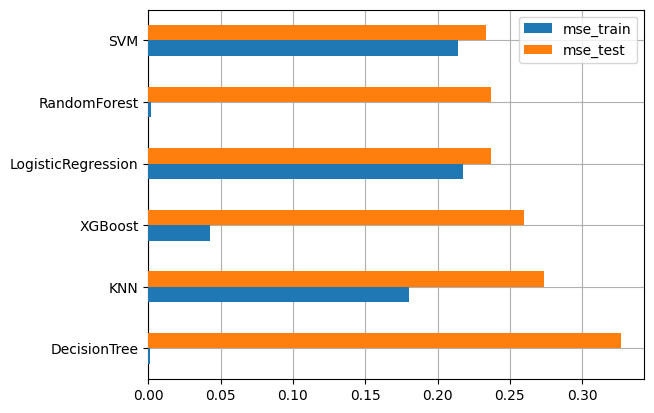

In [45]:
fig, ax = plt.subplots()
models[['mse_train','mse_test']].sort_values(by='mse_test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

*   Model dengan MSE terendah (minimum eror) adalah SVM

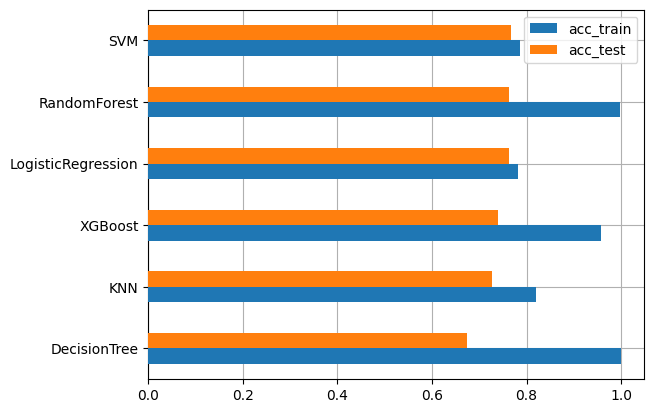

In [46]:
fig, ax = plt.subplots()
models[['acc_train','acc_test']].sort_values(by='acc_test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

*   Model dengan Accuracy tertinggi adalah SVM

# Kesimpulan

*   Atribut paling berkorelasi dengan kehadiran anggota pada kelas fitnes adalah: months_as_member berupa korelasi positif (0.49)
*   Model dengan performa akurasi dan MSE terbaik adalah SVM